# Convex Hull problem

##### INPUT: Q ( the set of points )
##### OUTPUT: CH(Q) ( set of points in the convex hull)

Generating some random points for the problem to create the Q:

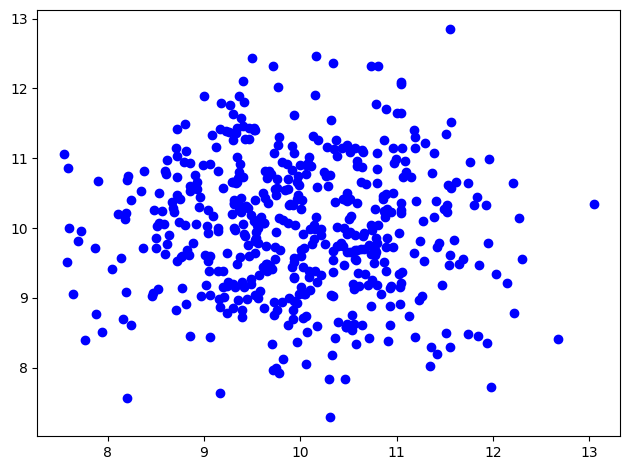

In [18]:
import matplotlib.pyplot as plt
import numpy as np

n = 500

X = np.random.randn(n)
Y = np.random.randn(n)

Q = []

for i in range(n):
    Q.append((X[i]+10,Y[i]+10))


plt.scatter([x for x,y in Q], [y for x,y in Q], color='blue')
plt.show()

##### How to find which side of the line a point is?
###### d=(x−x1)(y2−y1)−(y−y1)(x2−x1)
###### d<>0 defines which side of the line the point lies
###### reference: https://math.stackexchange.com/questions/274712/calculate-on-which-side-of-a-straight-line-is-a-given-point-located 

In [19]:
print(Q)

# Q = [(0.6485957604456125, 0.37647009381649477), (0.325978904148241, 0.08697945947637153), (0.9143938563637497, 0.9352356388352255), (0.4197507676927434, 1.0437628400810508), (-1.897166605265831, 0.7475387986390583), (0.02094343297700463, -0.9145198784083577), (-0.8022171957377892, -0.18056373488721628), (-0.48734432382187465, 0.21859259196096886), (1.224168865409126, 0.44734521048096926), (-0.9078726307585853, -0.16801705640761325), (-1.1425198383043278, 0.6848694705186688), (0.27094853303239996, 1.0840695172602388), (-0.7588986887221716, -0.9439482088228117), (-0.446118247237359, -0.6776980638810819), (0.18881779082674888, -0.21847450866482843), (-1.5371207656089216, -0.11370273418211008), (0.5503219738474701, -0.655421336954692), (-0.12044178474124093, 1.2604784884112403), (-0.38770925422871944, -0.6127301968994718), (1.7915773408399263, -0.5135559363409511)]

[(10.928717276803784, 9.142962748619015), (11.269964374029163, 10.100727844205325), (11.049030970432069, 10.354385675654331), (11.807981348966358, 10.328266624364128), (10.999506958068759, 11.648664964584471), (7.642263024642656, 9.054814804719014), (10.48445394127993, 10.509848800944505), (10.937899874632704, 10.232228360536057), (11.285690062936586, 9.531305517492134), (10.474964886000663, 8.582202082436835), (10.958250637574773, 11.14125132114928), (8.343586359876781, 10.537805972992201), (7.9435556770525615, 8.509519705126033), (7.5458213716966895, 11.058873086802054), (11.415321940385661, 8.19068933018028), (10.217659301928485, 9.98028524603217), (9.351583575835754, 8.976410589439025), (10.359186412388421, 10.367819329048626), (10.449336733183966, 9.465332336597676), (11.392901114564538, 11.077610708553676), (10.18033179029383, 11.262861163204484), (10.1413524064839, 10.039117924911944), (9.92706117646603, 8.823709304005165), (10.710379888020944, 9.754911052575633), (10.5176356749

In [20]:
# import time

import math

def dist(point, line_start, line_end):
    x1, y1 = line_start
    x2, y2 = line_end
    x0, y0 = point

    numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
    denominator = math.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)

    distance = numerator / denominator
    # print("distance: ", distance)
    return distance


def find_extreme_x_points(Qpoints):
    # print("find_extreme_x_points")
    Qpoints.sort(key=lambda x: x[0])
    return [Qpoints[0], Qpoints[-1]]

def find_extreme_y_points(Qpoints):
    # print("find_extreme_y_points")
    Qpoints.sort(key=lambda x: x[1])
    return [Qpoints[0], Qpoints[-1]]

def find_direction(extrm, p):
    # print("find_direction", extrm)
    x1, y1 = extrm[0]
    x2, y2 = extrm[1]
    x, y = p
    d=(x-x1)*(y2-y1) - (y-y1)*(x2-x1)
    return d

def plot_points(points, color):
    plt.scatter([x for x,y in points],[y for x,y in points], color=color)
    # plt.show()

# This will take some points and two extreme points and calculate the points that lies outside the line that the two extreme points are forming 
def find_hull(Qpoints, extrm1, extrm2, direction):
    print("finding hull: ", Qpoints, extrm1, extrm2, direction)
    hull = []
    # print("initially hull: ", hull)
    # if len(Qpoints)<=2:
    #     return Qpoints
    # else:
    # print("In else of find_hull")
    extreme = [extrm1, extrm2]
    # print(extreme)
    for i in range( len(Qpoints)):
        # h=[]
        d = find_direction(extreme,Qpoints[i])
        # print(d)
        if direction == "ul":
            if d < 0:
                # print('if',direction, d)
                hull.append(Qpoints[i])
        elif direction == "ur":            
            if d > 0:
                # print('elif',direction, d)
                hull.append(Qpoints[i])
        #         # print("h",h)
                
        elif direction == "ll":
            if d < 0:
                # print('elif',direction, d)
                hull.append(Qpoints[i])

        elif direction == "lr":
            if d < 0:
                # print('elif',direction, d)
                hull.append(Qpoints[i])
        # d=0
        # print("hull: ", hull)
    plot_points(Q,"black")
    # print("hull: ", hull)
    # plot_points(hull,"red") 
    
    x1, y1 =extrm1
    x2, y2 =extrm2
    plt.plot([x1,x2],[y1,y2],color='red', linestyle="dashed")
    plt.show()

    # main recursion
    if len(hull) == 0:
        return [extrm1, extrm2]
    elif direction == "ur" and find_direction(extreme,hull[-1])> 0:
        hull.sort(key=lambda x: dist(x,extrm1,extrm2)) #sort by distance from the line
        # print("sorted hull: ", hull)
        return find_hull(hull, extrm1, hull[-1], direction) + find_hull(hull, hull[-1], extrm2, direction)
    elif find_direction(extreme,hull[-1])< 0:
        # print("hull: ", hull)
        hull.sort(key=lambda x: dist(x,extrm1,extrm2)) #sort by distance from the line
        # print("sorted hull: ", hull)
        return find_hull(hull, extrm1, hull[-1], "ul") + find_hull(hull, hull[-1], extrm2, direction)
        # plot_points(newHull,"blue")     
                

def divide(Qpoints,CH):
    ur = []
    ul = []
    lr = []
    ll = []

    if len(Qpoints) <= 3:
        # plot_points(Qpoints,"black")
        return Qpoints
    else:   
        extrmX = find_extreme_x_points(Qpoints)
        extrmY = find_extreme_y_points(Qpoints)
        

        extrmPoints = extrmX + extrmY
        CH = CH + extrmPoints
        
        

        for i in range(len(Qpoints)):
            if Qpoints[i] not in CH:
                # print("iteration:",i+1)
                d_x = find_direction(extrmX, Qpoints[i])
                d_y = find_direction(extrmY, Qpoints[i])
                x,y=Qpoints[i]
                
                # for the upper left coordinates
                if d_x < 0 and d_y < 0:
                    # print("not in the line", d_x)
                    ul.append(Qpoints[i])
                    # plt.scatter(x,y,color="purple")


                # for the upper right coordinates
                elif d_x < 0 and d_y > 0:
                    # print("not in the line", d_x)
                    ur.append(Qpoints[i])
                    # plt.scatter(x,y,color="orange")
                
                # for the lower left coordinates
                elif d_x > 0 and d_y < 0:
                    # print("not in the line", d_x)
                    ll.append(Qpoints[i])
                    # plt.scatter(x,y,color="blue")

                # for the lower right coordinates
                elif d_x > 0 and d_y > 0:
                    # print("not in the line", d_x)
                    lr.append(Qpoints[i])
                    # plt.scatter(x,y,color="red")
        # plt.scatter([x for x,y in Qpoints], [y for x,y in Qpoints], color='black')
        # plt.scatter([x for x,y in extrmPoints],[y for x,y in extrmPoints],color='green')
        # plot_points(extrmPoints,"green")
        plt.plot([x for x,y in extrmX],[y for x,y in extrmX],color='yellow', linestyle="dashed")
        plt.plot([x for x,y in extrmY],[y for x,y in extrmY],color='yellow', linestyle="dashed")
        # plt.show()   

        if len(ul) > 0:
            CH = CH + find_hull(ul,extrmPoints[0],extrmPoints[3], "ul")
        if len(ur) > 0:    
            CH = CH + find_hull(ur,extrmPoints[1],extrmPoints[3], "ur")
        if len(lr) > 0:
            CH = CH + find_hull(lr,extrmPoints[1],extrmPoints[2], "lr")
        if len(ll) > 0:    
            CH = CH + find_hull(ll,extrmPoints[2],extrmPoints[0], "ll")
        
        # plot_points(CH,"red")

        plt.show()

        return CH


finding hull:  [(10.795046979738835, 10.640676009029466), (11.070520182610974, 10.73436031240337), (10.270360749242231, 10.744956119508343), (9.974721446532088, 10.752836573001336), (10.305292912000084, 10.766261855007857), (10.059477390219055, 10.777856545241585), (10.246306761095111, 10.801559160444043), (9.671968136836332, 10.818468999414897), (9.62866830514056, 10.821352236499717), (9.918721984670485, 10.83029815919598), (10.793322051743415, 10.842053022827656), (10.635411254415029, 10.874915612962043), (10.11011520728107, 10.883939329405106), (10.58496016479724, 10.89494194673024), (10.056069688976153, 10.898166341127375), (9.998982902987553, 10.902129801846549), (8.985868917081087, 10.91027066041808), (9.371548599606879, 10.916909330450888), (9.057153997875364, 10.917504749255501), (9.861125284264519, 10.924063918988297), (10.972803455753308, 10.9283704286738), (10.079213112146698, 10.929026895876486), (8.856676346188424, 10.930954182863822), (9.812157047248668, 10.94265172033373

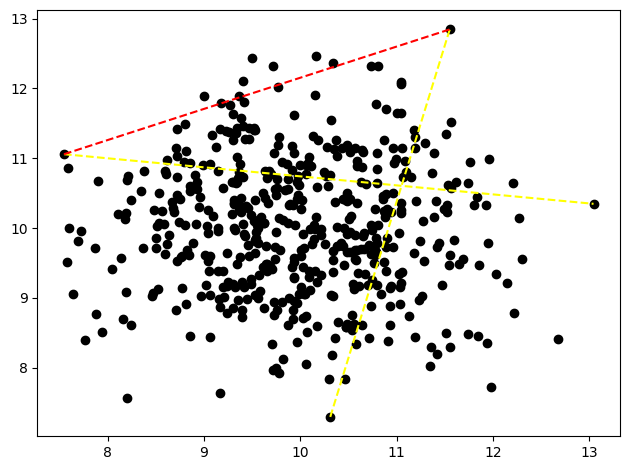

finding hull:  [(9.171731473509976, 11.790276709988502), (9.365610643080725, 11.889192582687278), (10.338065851995626, 12.365884953103608), (8.997279295916659, 11.887723583156474), (9.408978531789831, 12.113651894235332), (10.163257695505983, 12.460909946486657), (9.718835818506115, 12.318882758235063), (9.49442311454223, 12.436581642440546)] (7.5458213716966895, 11.058873086802054) (9.49442311454223, 12.436581642440546) ul


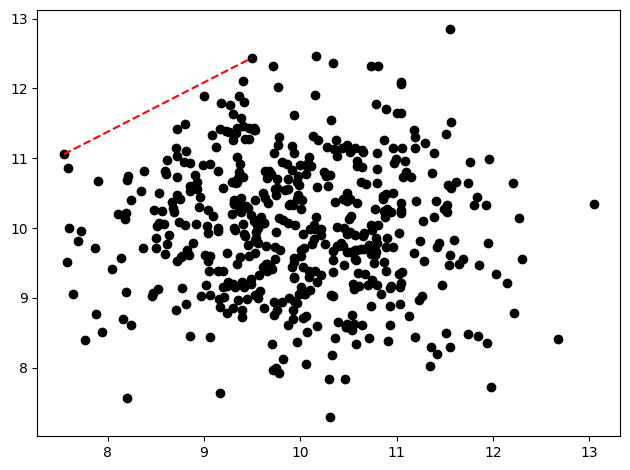

finding hull:  [(9.171731473509976, 11.790276709988502), (9.365610643080725, 11.889192582687278), (10.338065851995626, 12.365884953103608), (8.997279295916659, 11.887723583156474), (9.408978531789831, 12.113651894235332), (10.163257695505983, 12.460909946486657), (9.718835818506115, 12.318882758235063), (9.49442311454223, 12.436581642440546)] (9.49442311454223, 12.436581642440546) (11.55175334733772, 12.84689985028855) ul


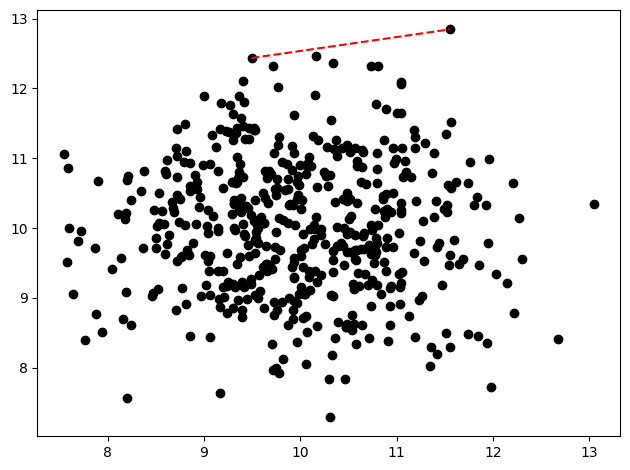

finding hull:  [(11.562407054647391, 10.575409845332834), (11.538005494956924, 10.624713838433184), (12.2069299094879, 10.641128374809044), (11.736461729435891, 10.644061250520432), (11.613433837403871, 10.654605180762939), (11.15068134750583, 10.726381196790594), (11.36708081373586, 10.79211294700634), (11.10097204139463, 10.80101070804271), (11.763630922076992, 10.940551115243256), (11.96099247099639, 10.992969206524263), (11.392901114564538, 11.077610708553676), (11.189918267989468, 11.151059298905226), (11.299409720900375, 11.225343621946841), (11.515330908582428, 11.352499392618842), (11.567893449040357, 11.51301590882786)] (13.044383573296578, 10.34822670988715) (11.55175334733772, 12.84689985028855) ur


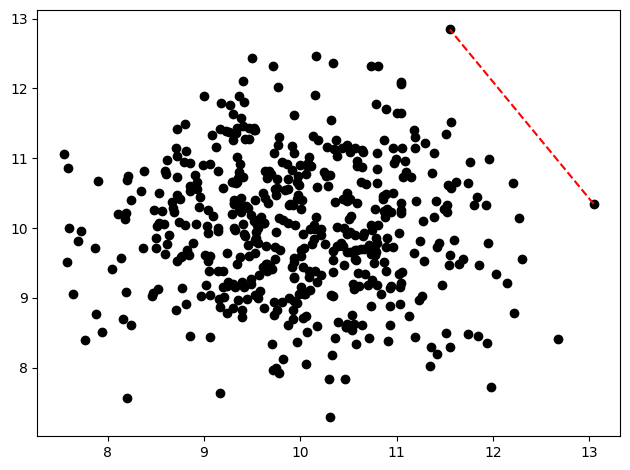

finding hull:  [(11.984056852209406, 7.725216963674478), (10.469048611273116, 7.838412354529765), (11.34812041366005, 8.023083142050975), (11.415321940385661, 8.19068933018028), (11.360085492623936, 8.290200110935956), (11.553271614835081, 8.302839998044213), (10.576407142622985, 8.345307320559634), (11.941781026365321, 8.357138414991057), (10.90904902013763, 8.383465464229698), (12.677920923392207, 8.411333750732428), (10.710528040199845, 8.425002907668334), (11.191259482654992, 8.445805215510548), (11.849525038922344, 8.453237983148487), (11.741079735247757, 8.490508445165325), (11.51260942683536, 8.50325416729277), (10.63764294201328, 8.610734747676066), (10.936232525688975, 8.61249869391216), (11.129620103780013, 8.741384752939842), (12.223708109832248, 8.779821027489614), (10.737543585594437, 8.87830442631156), (10.936132368172066, 8.881666931867539), (11.038617301198048, 8.911572985717097), (11.236627436274222, 8.969448866928312), (11.262918108383658, 9.027706517254963), (10.8382

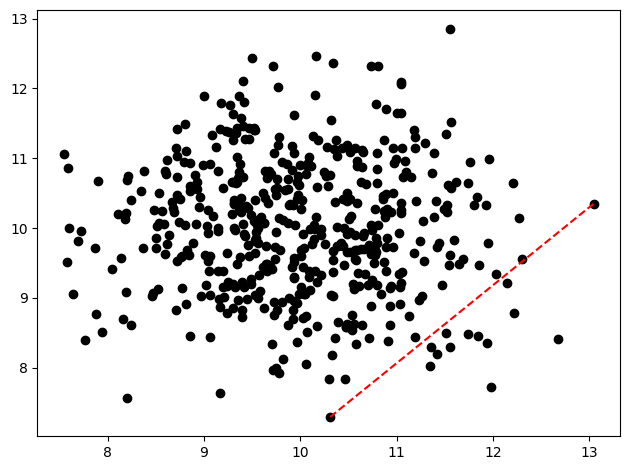

finding hull:  [(12.144610564342718, 9.219747130880926), (11.51260942683536, 8.50325416729277), (11.360085492623936, 8.290200110935956), (11.415321940385661, 8.19068933018028), (11.553271614835081, 8.302839998044213), (11.741079735247757, 8.490508445165325), (11.34812041366005, 8.023083142050975), (11.849525038922344, 8.453237983148487), (12.223708109832248, 8.779821027489614), (11.941781026365321, 8.357138414991057), (11.984056852209406, 7.725216963674478), (12.677920923392207, 8.411333750732428)] (13.044383573296578, 10.34822670988715) (12.677920923392207, 8.411333750732428) ul


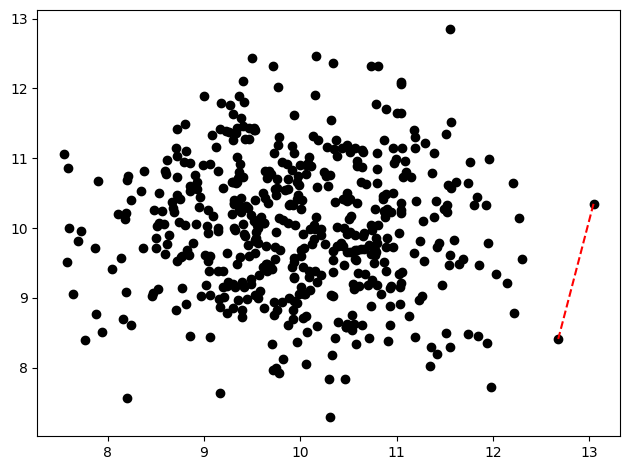

finding hull:  [(12.144610564342718, 9.219747130880926), (11.51260942683536, 8.50325416729277), (11.360085492623936, 8.290200110935956), (11.415321940385661, 8.19068933018028), (11.553271614835081, 8.302839998044213), (11.741079735247757, 8.490508445165325), (11.34812041366005, 8.023083142050975), (11.849525038922344, 8.453237983148487), (12.223708109832248, 8.779821027489614), (11.941781026365321, 8.357138414991057), (11.984056852209406, 7.725216963674478), (12.677920923392207, 8.411333750732428)] (12.677920923392207, 8.411333750732428) (10.310961112302257, 7.2958465899766445) lr


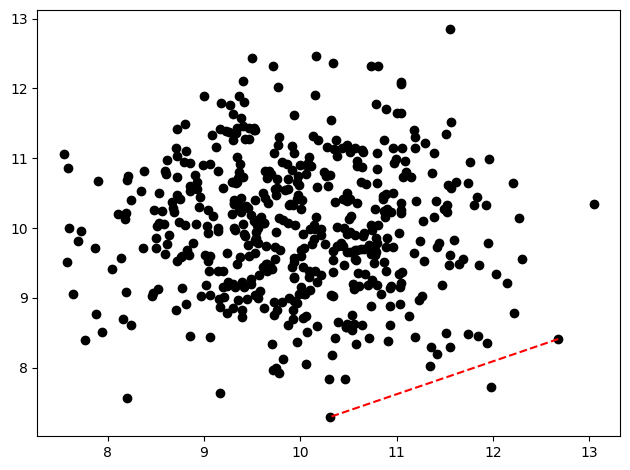

finding hull:  [(11.984056852209406, 7.725216963674478)] (12.677920923392207, 8.411333750732428) (11.984056852209406, 7.725216963674478) ul


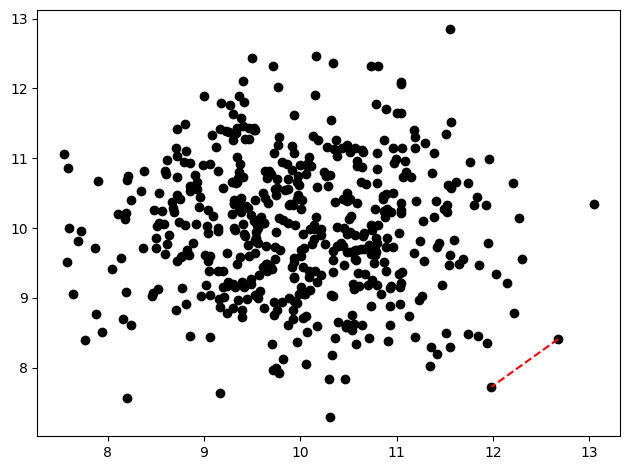

finding hull:  [(11.984056852209406, 7.725216963674478)] (11.984056852209406, 7.725216963674478) (10.310961112302257, 7.2958465899766445) lr


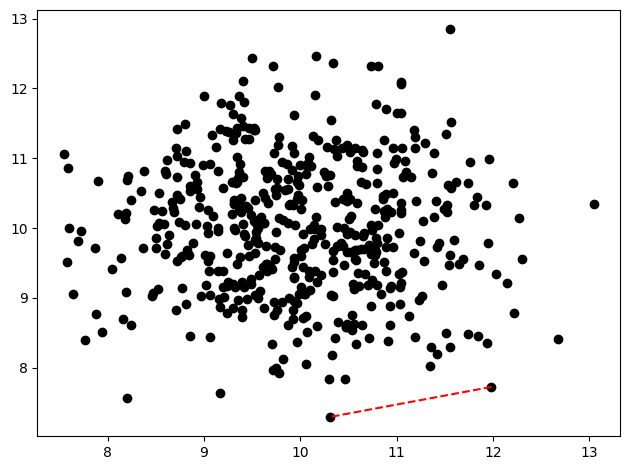

finding hull:  [(8.204068496825812, 7.565928987706725), (9.16583906458309, 7.639473055065746), (10.296973824345585, 7.83274783780589), (9.774255104760888, 7.923141737900657), (9.720173494364838, 7.97436457308673), (9.745437373312933, 7.991617159753405), (10.057454128654747, 8.046815403795279), (9.822348356265778, 8.123621187479449), (10.328764163191943, 8.18258027763991), (9.705627526365005, 8.341698353721346), (9.967451257769055, 8.371034155738458), (7.759619039805464, 8.395546401184593), (10.361415277569419, 8.431628158401281), (9.058889294376296, 8.438562243939526), (8.852929486997088, 8.455082638867763), (7.9435556770525615, 8.509519705126033), (10.068437561697996, 8.515289211510062), (10.540342226834294, 8.542583352003117), (10.469951907684944, 8.581649255349413), (10.474964886000663, 8.582202082436835), (10.177716321070935, 8.603529033777622), (9.874721824084931, 8.605569989167476), (8.239472238531112, 8.61161682623898), (10.481613232994823, 8.627615592185292), (10.56045144613291

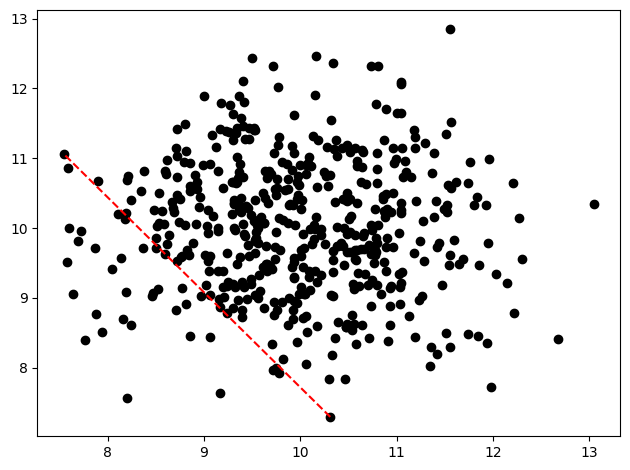

finding hull:  [(8.592353860684051, 9.62837975979348), (8.497181424435599, 9.709666734078535), (8.183169446104753, 10.132821055823984), (9.745437373312933, 7.991617159753405), (8.109555955963398, 10.19741734289246), (8.967286905169878, 9.022310952494234), (9.774255104760888, 7.923141737900657), (9.720173494364838, 7.97436457308673), (7.587428918654069, 10.856438666449822), (8.363196057945288, 9.713624090777273), (8.775114398776076, 9.148293027669682), (8.813549942441984, 8.914665550472037), (9.058889294376296, 8.438562243939526), (8.51758336308463, 9.129334692846632), (8.709421460928903, 8.833190588044786), (8.138866040817373, 9.565564336009476), (8.472392075958833, 9.072563970305666), (8.457017961581093, 9.02887482266637), (8.852929486997088, 8.455082638867763), (7.722935882476693, 9.959931116012621), (7.869926930616095, 9.717775646256987), (8.048226813776028, 9.418220452723443), (7.5980373078926835, 10.00297947374474), (7.687114729667065, 9.819079687045921), (8.192979172844705, 9.082

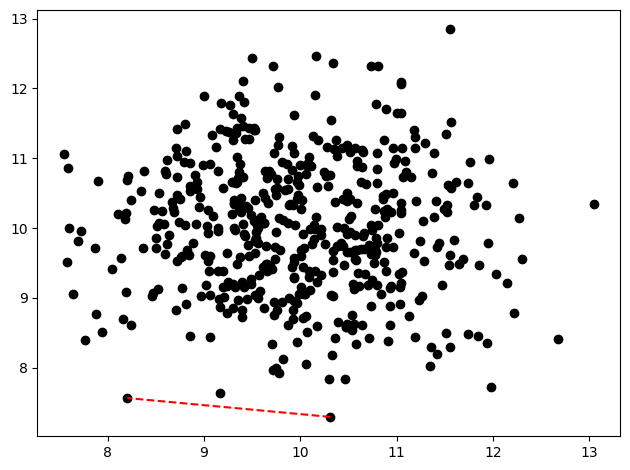

finding hull:  [(8.592353860684051, 9.62837975979348), (8.497181424435599, 9.709666734078535), (8.183169446104753, 10.132821055823984), (9.745437373312933, 7.991617159753405), (8.109555955963398, 10.19741734289246), (8.967286905169878, 9.022310952494234), (9.774255104760888, 7.923141737900657), (9.720173494364838, 7.97436457308673), (7.587428918654069, 10.856438666449822), (8.363196057945288, 9.713624090777273), (8.775114398776076, 9.148293027669682), (8.813549942441984, 8.914665550472037), (9.058889294376296, 8.438562243939526), (8.51758336308463, 9.129334692846632), (8.709421460928903, 8.833190588044786), (8.138866040817373, 9.565564336009476), (8.472392075958833, 9.072563970305666), (8.457017961581093, 9.02887482266637), (8.852929486997088, 8.455082638867763), (7.722935882476693, 9.959931116012621), (7.869926930616095, 9.717775646256987), (8.048226813776028, 9.418220452723443), (7.5980373078926835, 10.00297947374474), (7.687114729667065, 9.819079687045921), (8.192979172844705, 9.082

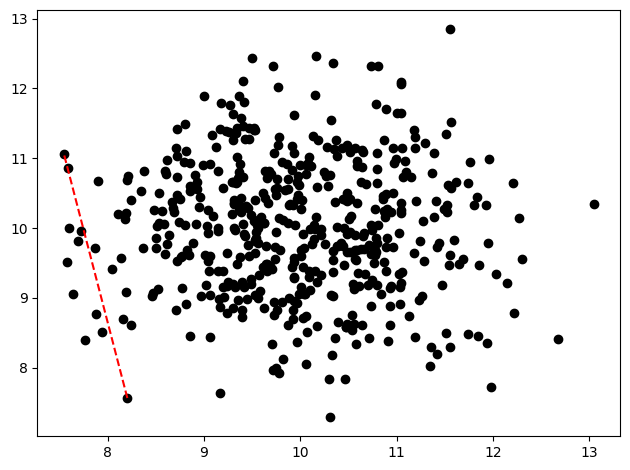

finding hull:  [(7.722935882476693, 9.959931116012621), (7.9435556770525615, 8.509519705126033), (7.687114729667065, 9.819079687045921), (7.881443842939275, 8.769422626370206), (7.5980373078926835, 10.00297947374474), (7.576306686807802, 9.510180198708598), (7.642263024642656, 9.054814804719014), (7.759619039805464, 8.395546401184593)] (8.204068496825812, 7.565928987706725) (7.759619039805464, 8.395546401184593) ul


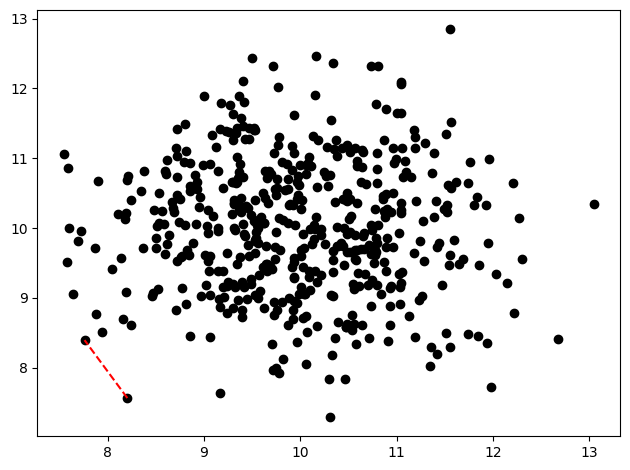

finding hull:  [(7.722935882476693, 9.959931116012621), (7.9435556770525615, 8.509519705126033), (7.687114729667065, 9.819079687045921), (7.881443842939275, 8.769422626370206), (7.5980373078926835, 10.00297947374474), (7.576306686807802, 9.510180198708598), (7.642263024642656, 9.054814804719014), (7.759619039805464, 8.395546401184593)] (7.759619039805464, 8.395546401184593) (7.5458213716966895, 11.058873086802054) ll


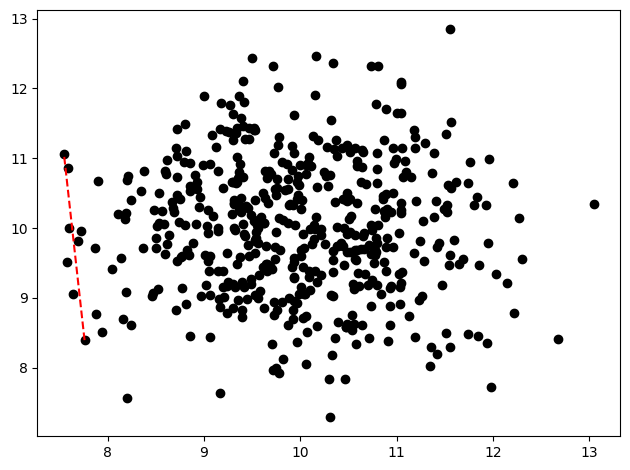

finding hull:  [(7.5980373078926835, 10.00297947374474), (7.642263024642656, 9.054814804719014), (7.576306686807802, 9.510180198708598)] (7.759619039805464, 8.395546401184593) (7.576306686807802, 9.510180198708598) ul


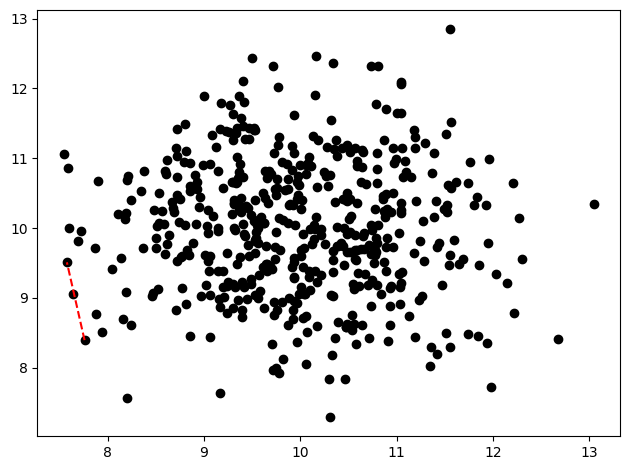

finding hull:  [(7.642263024642656, 9.054814804719014)] (7.759619039805464, 8.395546401184593) (7.642263024642656, 9.054814804719014) ul


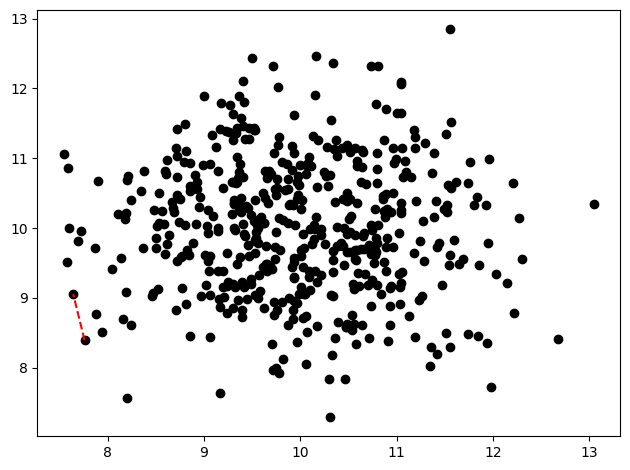

finding hull:  [(7.642263024642656, 9.054814804719014)] (7.642263024642656, 9.054814804719014) (7.576306686807802, 9.510180198708598) ul


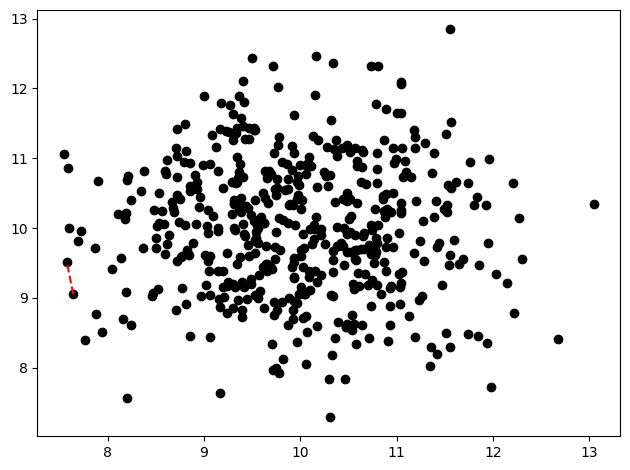

finding hull:  [(7.5980373078926835, 10.00297947374474), (7.642263024642656, 9.054814804719014), (7.576306686807802, 9.510180198708598)] (7.576306686807802, 9.510180198708598) (7.5458213716966895, 11.058873086802054) ll


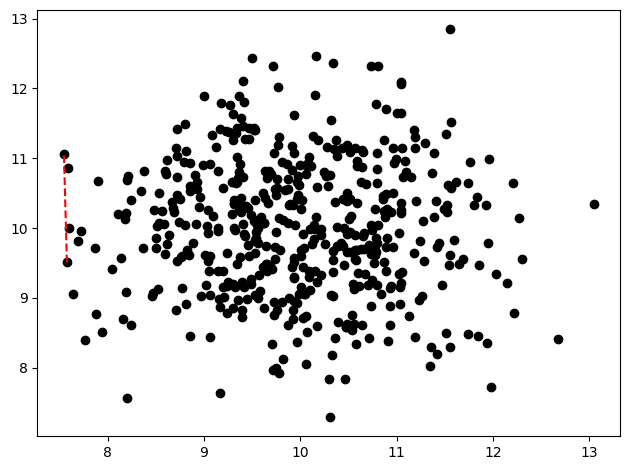

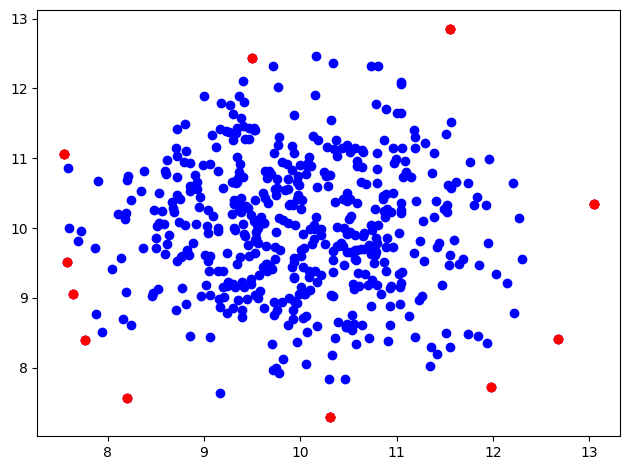

In [21]:
# Q = [(9.442852857541325, 7.179264008659379), (8.524910712049058, 8.758331167745489), (10.876681041820783, 9.12802686140276), (9.676943944756488, 9.29415951923898), (9.329675218407603, 9.354392918642358), (9.86917499820422, 9.36645412203831), (11.302630402657252, 9.379377488985202), (8.18166295082652, 9.516506097874647), (10.270807809294729, 9.727116932362769), (10.847965545821914, 9.855499401585563), (8.740034118462, 9.929733170821683), (10.277945029099381, 10.021009094058059), (10.036319124207646, 10.119726924368818), (12.149800409298697, 10.263866874181737), (10.278914849174889, 10.480757665461283), (11.325999842368134, 10.521788608937179), (12.32728623769903, 10.68120251284166), (11.021083886726325, 10.806947803695001), (9.264692198616428, 11.068851215820047), (9.813419731039216, 11.476335093289332), (11.361285685799775, 11.664507942611849), (11.086497467845955, 11.805361975809877), (9.82083087288825, 12.035142501452029), (9.600915343318322, 12.088378155614143), (10.574793050364045, 12.563371777245695)]
CH = []
Convex_Hull = divide(Q,CH)
# print(Convex_Hull)
plot_points(Q,"blue")
plot_points(Convex_Hull,"red")
plt.show()

